# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

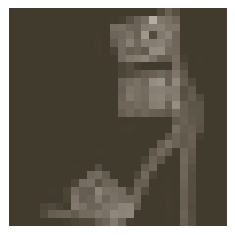

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
from torch import nn, optim

# want to run on GPU
device = torch.device("cuda:0")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [4]:
# test CUDA access
print(torch.cuda.is_available())
print(device)
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.rand(2,3).cuda())

True
cuda:0
0
1
GeForce GTX TITAN
tensor([[0.7268, 0.1341, 0.9331],
        [0.8981, 0.2114, 0.1353]])


In [19]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

deeper_model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Linear(32, 10),
                      nn.LogSoftmax(dim=1))

# want to run on GPU
model = model.cuda()
deeper_model = deeper_model.cuda()

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [20]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
criterion_for_deeper = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer_for_deeper = optim.Adam(deeper_model.parameters(), lr=0.01)

In [21]:
# TODO: Train the network here
num_epochs = 10

for e in range(num_epochs):
    running_loss = 0.0
    deeper_running_loss = 0.0
    for images, labels in trainloader:
        images = images.view((images.shape[0], -1))
        # want to run on GPU
        images = images.cuda()
        labels = labels.cuda()
        
        optimizer.zero_grad()
        preds = model(images)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        
        optimizer_for_deeper.zero_grad()
        deeper_preds = deeper_model(images)
        deeper_loss = criterion_for_deeper(deeper_preds, labels)
        deeper_loss.backward()
        optimizer_for_deeper.step()
        deeper_running_loss += deeper_loss
    else:
        print(f"Epoch #{e}")
        print(f"Training loss: {running_loss / len(trainloader)}")
        print(f"Training loss (deeper): {deeper_running_loss / len(trainloader)}")

Epoch #0
Training loss: 0.5488830208778381
Training loss (deeper): 0.6282981038093567
Epoch #1
Training loss: 0.45266297459602356
Training loss (deeper): 0.4649723768234253
Epoch #2
Training loss: 0.4150458574295044
Training loss (deeper): 0.4381098747253418
Epoch #3
Training loss: 0.4013567268848419
Training loss (deeper): 0.4316832423210144
Epoch #4
Training loss: 0.39356064796447754
Training loss (deeper): 0.4217858910560608
Epoch #5
Training loss: 0.38522106409072876
Training loss (deeper): 0.4105563461780548
Epoch #6
Training loss: 0.3768136203289032
Training loss (deeper): 0.42898812890052795
Epoch #7
Training loss: 0.3698861598968506
Training loss (deeper): 0.40878528356552124
Epoch #8
Training loss: 0.36965247988700867
Training loss (deeper): 0.39165520668029785
Epoch #9
Training loss: 0.3666974902153015
Training loss (deeper): 0.40949130058288574


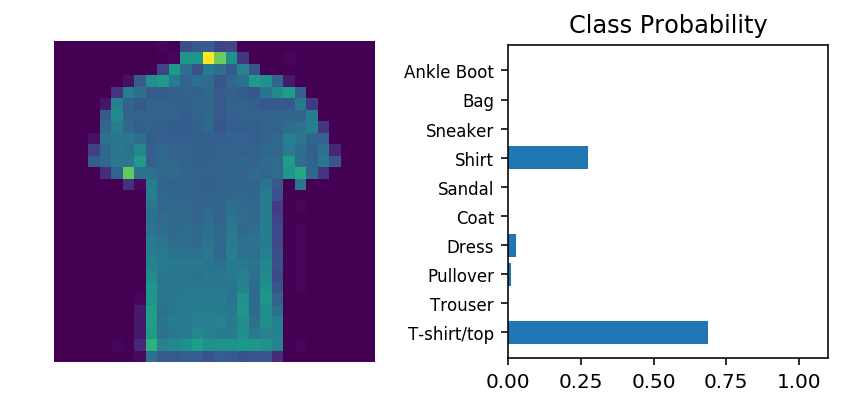

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
cuda_img = img.cuda()
ps = torch.exp(model(cuda_img)).cpu()
ps_deeper = torch.exp(deeper_model(cuda_img)).cpu()

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

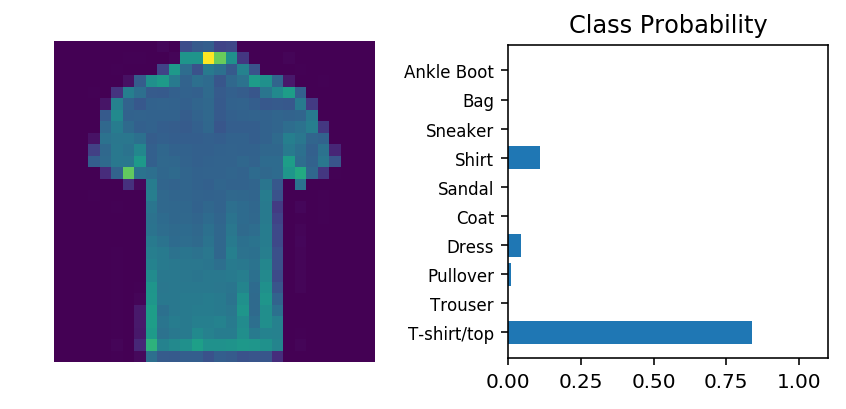

In [23]:
helper.view_classify(img.resize_(1, 28, 28), ps_deeper, version='Fashion')